# COVID-19 Epitope Prediction using SARS/B-Cell Epitope Data

members:
- Donaire
- Gonzales
- Moncayo
- Pajaro

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h3>Importing SARS and B-Cell Epitope Data</h3>

In [2]:
sars_csv = pd.read_csv('input_sars.csv')
bcell_csv = pd.read_csv('input_bcell.csv')

sars = sars_csv.copy()
b_cell = bcell_csv.copy()

sars = sars.drop(['parent_protein_id','protein_seq','start_position','end_position','peptide_seq'],axis=1)
b_cell = b_cell.drop(['parent_protein_id','protein_seq','start_position','end_position','peptide_seq'],axis=1)

df = pd.concat([sars,b_cell], ignore_index=True)
#df = sars.copy()
df.head()

,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,0.887,0.040,1.056,-2.159,5.569763,0.116335,-0.061116,33.205116,0
1,0.869,0.047,1.056,-2.500,5.569763,0.116335,-0.061116,33.205116,0
2,0.621,0.042,1.148,-7.467,5.569763,0.116335,-0.061116,33.205116,0
3,1.021,0.230,1.049,0.927,5.569763,0.116335,-0.061116,33.205116,0
4,1.089,0.627,1.015,3.165,5.569763,0.116335,-0.061116,33.205116,0


In [3]:
len(df)

14907

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df.drop('target',axis=1))
scaled_features = scaler.transform(df.drop('target',axis=1))

In [5]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability
0,-0.872660,-0.571079,0.639956,-2.000195,-0.770647,1.485254,0.847637,-0.614054
1,-1.018230,-0.567245,0.639956,-2.174677,-0.770647,1.485254,0.847637,-0.614054
2,-3.023860,-0.569984,2.361893,-4.716175,-0.770647,1.485254,0.847637,-0.614054
3,0.211028,-0.467028,0.508939,-0.421160,-0.770647,1.485254,0.847637,-0.614054
4,0.760959,-0.249618,-0.127429,0.723972,-0.770647,1.485254,0.847637,-0.614054


<h3>Plots</h3>

In [6]:
#sns.pairplot(df,hue='target')

<h3>Finding out the k value</h3>

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [8]:
#First use accuracy rate to find out k value
accuracy_rate = []
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['target'],cv=10)
    accuracy_rate.append(score.mean())
    error_rate.append(1-score.mean())

Visualizations

Text(0, 0.5, 'Accuracy Rate')

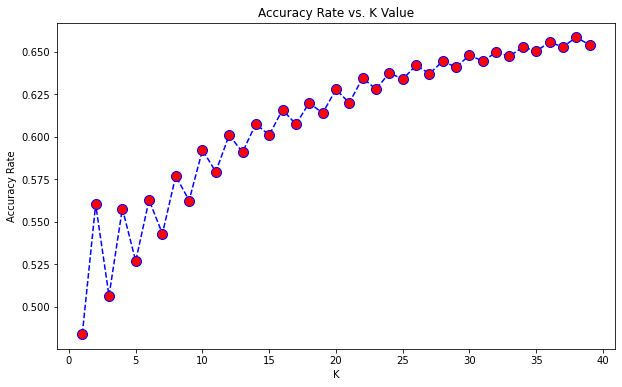

In [9]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

Text(0, 0.5, 'Error Rate')

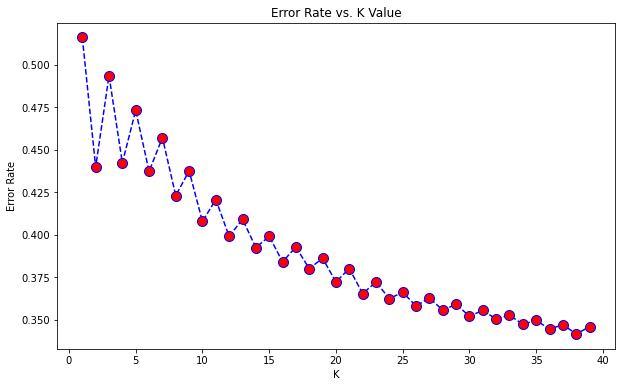

In [10]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

<h3>Train and Test Split</h3>

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(scaled_features, df['target'], test_size=0.2, random_state=0)

<h3>Creating the Actual Model</h3>

In [12]:
knn = KNeighborsClassifier(n_neighbors=39)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=21')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=21


[[2069   98]
 [ 622  193]]


              precision    recall  f1-score   support

           0       0.77      0.95      0.85      2167
           1       0.66      0.24      0.35       815

    accuracy                           0.76      2982
   macro avg       0.72      0.60      0.60      2982
weighted avg       0.74      0.76      0.71      2982



<h3>Feature Importance</h3>

In [13]:
from matplotlib import pyplot as plt

In [14]:
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance

results = permutation_importance(knn, x_train, y_train, scoring='accuracy')
importance = results.importances_mean

Feature: 0, Score: 0.01117
Feature: 1, Score: 0.00458
Feature: 2, Score: 0.01008
Feature: 3, Score: 0.01645
Feature: 4, Score: 0.03403
Feature: 5, Score: 0.02407
Feature: 6, Score: 0.02814
Feature: 7, Score: 0.03943


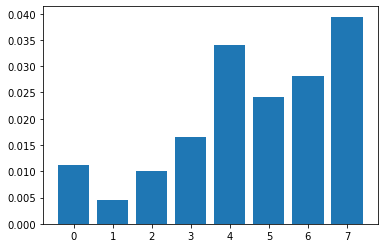

In [15]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

<h3>Rerun with Feature Importance Applied</h3>

In [16]:
sars_fi = sars.drop(['chou_fasman','emini','kolaskar_tongaonkar','parker'],axis=1)
b_cell_fi = b_cell.drop(['chou_fasman','emini','kolaskar_tongaonkar','parker'],axis=1)

df_fi = pd.concat([sars_fi,b_cell_fi], ignore_index=True)
#df = sars.copy()
df_fi.head()

,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,5.569763,0.116335,-0.061116,33.205116,0
1,5.569763,0.116335,-0.061116,33.205116,0
2,5.569763,0.116335,-0.061116,33.205116,0
3,5.569763,0.116335,-0.061116,33.205116,0
4,5.569763,0.116335,-0.061116,33.205116,0


In [17]:
scaler_fi = StandardScaler()
scaler_fi.fit(df_fi.drop('target',axis=1))
scaled_features_fi = scaler_fi.transform(df_fi.drop('target',axis=1))

df_feat_fi = pd.DataFrame(scaled_features_fi,columns=df_fi.columns[:-1])
df_feat_fi.head()

,isoelectric_point,aromaticity,hydrophobicity,stability
0,-0.770647,1.485254,0.847637,-0.614054
1,-0.770647,1.485254,0.847637,-0.614054
2,-0.770647,1.485254,0.847637,-0.614054
3,-0.770647,1.485254,0.847637,-0.614054
4,-0.770647,1.485254,0.847637,-0.614054


In [18]:
accuracy_rate_fi = []
error_rate_fi = []

for i in range(1,40):
    knn_fi = KNeighborsClassifier(n_neighbors=i)
    score_fi=cross_val_score(knn_fi,df_feat_fi,df_fi['target'],cv=10)
    accuracy_rate_fi.append(score_fi.mean())
    error_rate_fi.append(1-score_fi.mean())

Text(0, 0.5, 'Accuracy Rate')

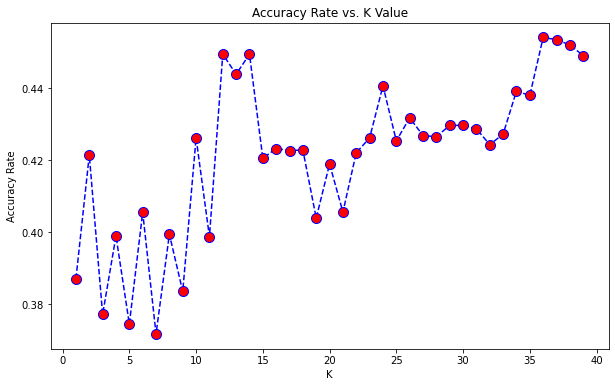

In [19]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate_fi,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

Text(0, 0.5, 'Error Rate')

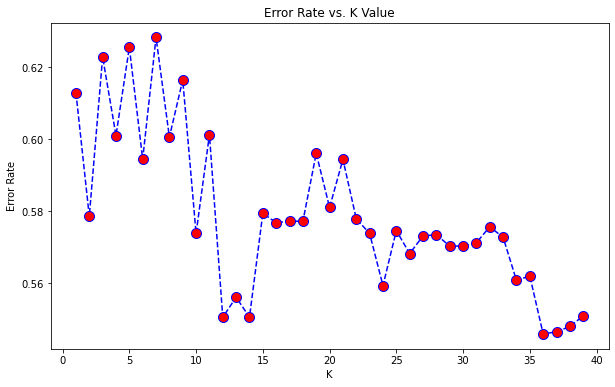

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate_fi,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [23]:
x_train_fi,x_test_fi,y_train_fi,y_test_fi = train_test_split(scaled_features_fi, df_fi['target'], test_size=0.2, random_state=0)

knn_fi = KNeighborsClassifier(n_neighbors=25)

knn_fi.fit(x_train_fi,y_train_fi)
pred_fi = knn_fi.predict(x_test_fi)

print('WITH K=21')
print('\n')
print(confusion_matrix(y_test_fi,pred_fi))
print('\n')
print(classification_report(y_test_fi,pred_fi))

WITH K=21


[[2044  123]
 [ 428  387]]


              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2167
           1       0.76      0.47      0.58       815

    accuracy                           0.82      2982
   macro avg       0.79      0.71      0.73      2982
weighted avg       0.81      0.82      0.80      2982

